# Annual

# Make Sure the modules are installed



# Import modules

In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [14]:
!pwd

/home/gdillon/JupyterPractice/graffiti_SF311


# produce viz of annual total 2009-2016
because I'm using SQL type queery with count(*), this responds faster

## api call for count of all by year

In [15]:
url = 'https://data.sfgov.org/resource/qer8-n8u9.csv?$select=date_trunc_y(opened)as%20year,%20count(*)&$order=year&$group=year'

In [16]:
df = pd.read_csv(url)
df = df[1:]
df

,year,count
1,01/01/2009 12:00:00 AM,32285
2,01/01/2010 12:00:00 AM,26769
3,01/01/2011 12:00:00 AM,25445
4,01/01/2012 12:00:00 AM,26254
5,01/01/2013 12:00:00 AM,35831
6,01/01/2014 12:00:00 AM,46808
7,01/01/2015 12:00:00 AM,57249
8,01/01/2016 12:00:00 AM,71651


In [5]:
df['year'].str.extract('(?P<year>\d{4})').astype(int)


/home/gdillon/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


1    2009
2    2010
3    2011
4    2012
5    2013
6    2014
7    2015
8    2016
Name: year, dtype: int64

In [6]:
df['year']=df['year'].str.extract('(?P<year>\d{4})').astype(str)
df['count']=df['count'].astype(int)
years = df['year'].tolist()
print(years)
srn = df['count'].tolist()
print(srn)


['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
[32285, 26769, 25445, 26254, 35831, 46808, 57249, 71559]


/home/gdillon/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


<Container object of 8 artists>

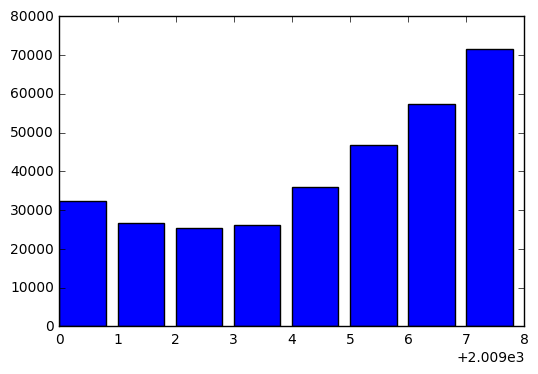

In [7]:
import matplotlib.pyplot as plt


#x = range(N)
width = 1/1.5
plt.bar(years, srn )


In [8]:
df = df[3:]
df

,year,count
4,2012,26254
5,2013,35831
6,2014,46808
7,2015,57249
8,2016,71559


['2012', '2013', '2014', '2015', '2016']
[26254, 35831, 46808, 57249, 71559]


<Container object of 5 artists>

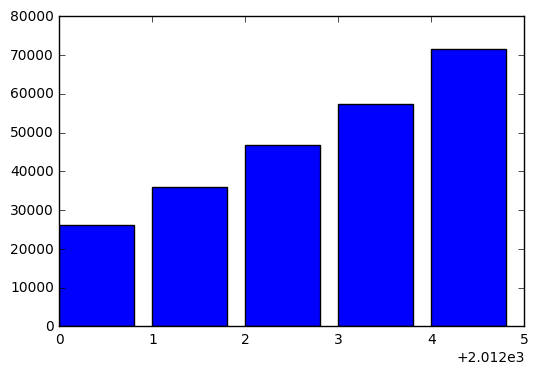

In [9]:

years = df['year'].tolist()
print(years)
srn = df['count'].tolist()
print(srn)
width = 1/1.5
plt.bar(years, srn )

In [10]:
url = 'https://data.sfgov.org/resource/qer8-n8u9.csv?$select=source,date_trunc_y(opened)as%20year,%20count(*)&$order=year&$group=year,source'

In [11]:
print(url)

https://data.sfgov.org/resource/qer8-n8u9.csv?$select=source,date_trunc_y(opened)as%20year,%20count(*)&$order=year&$group=year,source


In [12]:
df=pd.read_csv(url)
df=df[18:]
df

,Source,year,count
18,Open311,01/01/2013 12:00:00 AM,4030
19,Integrated Agency,01/01/2013 12:00:00 AM,9666
20,Voice In,01/01/2013 12:00:00 AM,9293
21,Web Self Service,01/01/2013 12:00:00 AM,11330
22,Twitter,01/01/2013 12:00:00 AM,1512
23,NaN,01/01/2014 12:00:00 AM,5
24,Open311,01/01/2014 12:00:00 AM,19813
25,Twitter,01/01/2014 12:00:00 AM,2227
26,Web Self Service,01/01/2014 12:00:00 AM,11769
27,Integrated Agency,01/01/2014 12:00:00 AM,5493


In [13]:
pd.crosstab(df.source, df.Twitter, margins=True)


AttributeError: 'DataFrame' object has no attribute 'source'

In [14]:
df = pd.read_csv(url)
df['count'].astype(int)
df['year'].str.extract('(?P<year>\d{4})').astype(str)
df = df[18:]

df

/home/gdillon/.local/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


,Source,year,count
18,Open311,01/01/2013 12:00:00 AM,4030
19,Integrated Agency,01/01/2013 12:00:00 AM,9666
20,Voice In,01/01/2013 12:00:00 AM,9293
21,Web Self Service,01/01/2013 12:00:00 AM,11330
22,Twitter,01/01/2013 12:00:00 AM,1512
23,NaN,01/01/2014 12:00:00 AM,5
24,Open311,01/01/2014 12:00:00 AM,19813
25,Twitter,01/01/2014 12:00:00 AM,2227
26,Web Self Service,01/01/2014 12:00:00 AM,11769
27,Integrated Agency,01/01/2014 12:00:00 AM,5493


In [15]:
x = ['2009','2010','2011','2012','2013','2014','2015','2016']

In [16]:
import matplotlib.pyplot as plt

#x = [1,2,3,4,5,6,7,8]
#x = ['2008','2009','2010','2011','2012','2013','2014','2015','2016']

#N = len(y)
#x = range(N)
#width = 1/1.5
plt.bar(x, y )




NameError: name 'y' is not defined

#  I'm going to focus on the period from 2013 on because
# That's when the upward trend in reports began with the 
# usage of the mobile app

# Growth in reports (2013 to 2016)

In [17]:
!date -d "1 week ago 13:00" '+%Y-%m-%d'

2016-12-17


This year and last year work

In [18]:
annum = !date -d "this year 13:00" '+%Y-01-01'
onorafter = str(annum)[1:-1]

In [19]:
print(onorafter)

'2016-01-01'


## deal with the limits of Socrata

In [20]:
#All Graffiti Currently Set for one year, but limit is 50, 000
'''
https://data.sfgov.org/resource/rme2-xgvs.json
https://data.sfgov.org/resource/rme2-xgvs.json
The graffiti_url is the target URL
and could be swapped out, and the code should still run
'''
graffiti_url = 'https://data.sfgov.org/resource/rme2-xgvs.json'
target_url=graffiti_url

In [21]:
url0 = str(target_url)[:-4]+'csv'
url0

'https://data.sfgov.org/resource/rme2-xgvs.csv'

In [22]:

limit = '?$limit=50000'
offset = '&$offset=50000'
url1 = url0+limit
print (url1)

url2 = url1 + offset
print (url2)

https://data.sfgov.org/resource/rme2-xgvs.csv?$limit=50000
https://data.sfgov.org/resource/rme2-xgvs.csv?$limit=50000&$offset=50000


In [23]:
#print(url2)
where = '&$where='
category = 'opened'
start = '>='

#date format 'year-mm-dd'
onorafter = "'2016-01-01'"
url2 = url2 + where + category + start + str(onorafter) 
print(url2)

https://data.sfgov.org/resource/rme2-xgvs.csv?$limit=50000&$offset=50000&$where=opened>='2016-01-01'


# Concatenate or Vertically stack the two dataFrames

In [ ]:
df1  = pd.read_csv(url1)
df2 = pd.read_csv(url2)

In [ ]:
frames = [df1,df2]

In [134]:
df = pd.concat(frames)

In [135]:
df.shape

(70391, 16)

In [136]:
df.head(2)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6633066,12/15/2016 07:28:31 PM,NaN,12/15/2016 08:08:54 PM,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_commercial - Not_Offensive,"1263 MISSION ST, SAN FRANCISCO, CA, 94103",6.0,South of Market,"(37.776545040358, -122.414049853039)",Open311,http://mobile311.sfgov.org/media/san_francisco...
1,6632969,12/15/2016 06:23:52 PM,NaN,12/15/2016 06:27:52 PM,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Signal_box - Not_Offensive,Intersection of 20TH ST and FLORIDA ST,9.0,Mission,"(37.7591338604323, -122.410758686679)",Open311,http://mobile311.sfgov.org/media/san_francisco...


In [137]:
df.tail(1)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
20390,5421825,01/01/2016 01:59:36 AM,03/25/2016 03:07:10 PM,03/25/2016 03:07:10 PM,Closed,Case Resolved -,SFMTA - Muni System Feedback Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Other_enter_additional_details_below - Offensive,"501 YORK ST, SAN FRANCISCO, CA, 94110",10.0,Mission,"(37.762920097989, -122.409087128107)",Open311,http://mobile311.sfgov.org/media/san_francisco...


# Convert the time series into pandas time version

In [138]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [141]:
type(df.Opened)

pandas.core.series.Series

In [150]:
df['Opened'] = pd.to_datetime(df['Opened'])



In [152]:
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])


In [153]:
df['Opened'].head(2)

0   2016-12-15 19:28:31
1   2016-12-15 18:23:52
Name: Opened, dtype: datetime64[ns]

In [160]:
df['Diff'] =(df.Closed-df.Opened).astype('timedelta64[D]')

In [162]:
df.Diff.describe()

count    58909.000000
mean        15.105994
std         31.697894
min         -1.000000
25%          0.000000
50%          3.000000
75%         17.000000
max        345.000000
Name: Diff, dtype: float64

In [173]:
df[df['Neighborhood' ]== "Mission"].head(85)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL,time,Diff
1,6632969,2016-12-15 18:23:52,NaT,2016-12-15 18:27:52,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Signal_box - Not_Offensive,Intersection of 20TH ST and FLORIDA ST,9.0,Mission,"(37.7591338604323, -122.410758686679)",Open311,http://mobile311.sfgov.org/media/san_francisco...,2016-12-15 18:23:52,NaN
2,6632939,2016-12-15 18:06:45,NaT,2016-12-15 19:09:11,Open,accepted,DPW Ops Queue,Graffiti Private Property,Not_Offensive Graffiti on Private Property,Building_residential - Not_Offensive,"2701 FOLSOM ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.753980359532, -122.414036033345)",Open311,http://mobile311.sfgov.org/media/san_francisco...,2016-12-15 18:06:45,NaN
4,6632864,2016-12-15 17:30:31,NaT,2016-12-15 17:30:31,Open,accepted,DPW Ops Queue,Graffiti Private Property,Offensive Graffiti on Private Property,Building_residential - Offensive,Intersection of 18TH ST and SAN CARLOS ST,9.0,Mission,"(37.7617892171553, -122.420128321734)",Open311,http://mobile311.sfgov.org/media/san_francisco...,2016-12-15 17:30:31,NaN
7,6632192,2016-12-15 14:46:44,NaT,2016-12-15 16:55:40,Open,accepted,DPW Ops Queue,Graffiti Private Property,Offensive Graffiti on Private Property,Building_commercial - Offensive,"3149 24TH ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.75240055061, -122.415135717521)",Open311,http://mobile311.sfgov.org/media/san_francisco...,2016-12-15 14:46:44,NaN
8,6632185,2016-12-15 14:45:41,NaT,2016-12-15 16:55:39,Open,accepted,DPW Ops Queue,Graffiti Private Property,Offensive Graffiti on Private Property,Building_residential - Offensive,"3173 24TH ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.7522517601, -122.415646797574)",Open311,http://mobile311.sfgov.org/media/san_francisco...,2016-12-15 14:45:41,NaN
9,6632173,2016-12-15 14:42:34,NaT,2016-12-15 19:15:58,Open,Open,311 Service Request Queue - Hold,Graffiti Public Property,Offensive Graffiti on Public Property,Other_enter_additional_details_below - Offensive,"1308 SOUTH VAN NESS AVE, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.752124257518, -122.416579206991)",Open311,http://mobile311.sfgov.org/media/san_francisco...,2016-12-15 14:42:34,NaN
10,6632163,2016-12-15 14:39:52,NaT,2016-12-15 16:55:38,Open,accepted,DPW Ops Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Bike_rack - Offensive,"2807 MISSION ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.752086884874, -122.418244876226)",Open311,http://mobile311.sfgov.org/media/san_francisco...,2016-12-15 14:39:52,NaN
11,6632161,2016-12-15 14:39:33,NaT,2016-12-15 16:55:36,Open,open,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Pole - Not_Offensive,"2807 MISSION ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.752086884874, -122.418244876226)",Open311,http://mobile311.sfgov.org/media/san_francisco...,2016-12-15 14:39:33,NaN
12,6632160,2016-12-15 14:39:17,NaT,2016-12-15 16:55:35,Open,accepted,DPW Ops Queue,Graffiti Public Property,Offensive Graffiti on Public Property,Bike_rack - Offensive,"2807 MISSION ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.752086884874, -122.418244876226)",Open311,http://mobile311.sfgov.org/media/san_francisco...,2016-12-15 14:39:17,NaN
14,6631965,2016-12-15 13:45:09,NaT,2016-12-15 14:14:56,Open,accepted,DPW Ops Queue,Graffiti Public Property,Not_Offensive Graffiti on Public Property,Sidewalk_structure - Not_Offensive,Intersection of 24TH ST and MISSION ST,9.0,Mission,"(37.7522394710724, -122.418445426677)",Open311,http://mobile311.sfgov.org/media/san_francisco...,2016-12-15 13:45:09,NaN


In [178]:
df[df['Neighborhood' ]== "Mission"].describe()

,CaseID,Supervisor District,Diff
count,1.235000e+04,12350.000000,10625.000000
mean,5.959355e+06,8.987449,14.974776
std,3.687978e+05,0.264365,30.532605
min,5.421825e+06,6.000000,0.000000
25%,5.636899e+06,9.000000,0.000000
50%,5.902392e+06,9.000000,3.000000


In [180]:
df['Responsible Agency'].value_counts()[:6]

DPW Ops Queue                          46572
US Postal Service Maintenance Queue     5088
Clear Channel - Transit Queue           3806
DPT Meter_Bike Queue                    3070
311 Service Request Queue - Hold        2176
DPW BSM Queue                           2126
Name: Responsible Agency, dtype: int64

In [171]:
df[df['Responsible Agency'] == 'US Postal Service Maintenance Queue']['Diff'].describe()

count    3556.000000
mean       21.644544
std        20.153411
min         0.000000
25%        10.000000
50%        15.000000
75%        26.000000
max       119.000000
Name: Diff, dtype: float64

In [181]:
df[df['Responsible Agency'] == 'Clear Channel - Transit Queue']['Diff'].describe()

count    3780.000000
mean        1.712169
std         4.939508
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       157.000000
Name: Diff, dtype: float64

In [182]:
df[df['Responsible Agency'] == 'DPW Ops Queue']['Diff'].describe()

count    38517.000000
mean        13.541761
std         26.218089
min         -1.000000
25%          0.000000
50%          3.000000
75%         18.000000
max        277.000000
Name: Diff, dtype: float64

In [184]:
df[df['Category'] == 'Graffiti Private Property']['Diff'].describe()

count    20360.000000
mean        18.794646
std         32.563743
min         -1.000000
25%          1.000000
50%          5.000000
75%         33.000000
max        333.000000
Name: Diff, dtype: float64

In [185]:
df[df['Category'] == 'Graffiti Public Property']['Diff'].describe()

count    38549.000000
mean        13.157799
std         31.055016
min          0.000000
25%          0.000000
50%          2.000000
75%         12.000000
max        345.000000
Name: Diff, dtype: float64

In [186]:
df['Source'].value_counts()

Open311              53582
Integrated Agency     7880
Web Self Service      4515
Voice In              4222
Twitter                192
Name: Source, dtype: int64

In [187]:
df[df['Source'] == 'Open311']['Diff'].describe()

count    47936.000000
mean        13.954523
std         30.267981
min          0.000000
25%          0.000000
50%          3.000000
75%         14.000000
max        345.000000
Name: Diff, dtype: float64

In [188]:
df[df['Source'] == 'Voice In']['Diff'].describe()

count    3786.000000
mean       12.463550
std        22.913216
min         0.000000
25%         0.000000
50%         2.000000
75%        14.000000
max       315.000000
Name: Diff, dtype: float64

In [189]:
df[df['Source'] == 'Integrated Agency']['Diff'].describe()

count    3280.000000
mean       39.177744
std        52.948925
min        -1.000000
25%        17.000000
50%        36.000000
75%        36.000000
max       277.000000
Name: Diff, dtype: float64

# Consider some exploratory statistics / reality checks

In [ ]:
source = df.Source.value_counts()
print(type(source))


print(source)

In [ ]:
type(source)

In [ ]:
label_list = source.index.tolist()
print(label_list)

In [ ]:
source = source.tolist()
source


In [ ]:


plt.axis("equal")
plt.pie(
        source,
        labels=label_list,
        autopct="%1.1f%%"
        )
plt.title("Graffiti Reports Submitted in 2016")
plt.show()

In [ ]:
df['Supervisor District'].value_counts().head(11)

# Get list of Supervisor's'

In [ ]:

plt.rcdefaults()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, people)
plt.xlabel('Performance')
plt.title('How fast do you want to go today?')

plt.show()

In [ ]:

fig, ax = plt.subplots(1)
np.random.seed(14)
n = 10
plt.bar(ax, np.arange(n), np.abs(np.random.randn(n)), annotate=True, grid='y')
fig.savefig('bar_prettyplotlib_grid_annotated.png')

In [ ]:
df['Status Notes'].value_counts().head(10)

In [ ]:
df['Status'].value_counts().head()

In [ ]:
df['Responsible Agency'].value_counts().head(4)

In [ ]:
df.Category.value_counts().head()

In [ ]:
df['Request Type'].value_counts().head(10)

In [ ]:
df['Request Details'].value_counts().head(20)

In [ ]:
df['Address'].value_counts().head(20)

In [ ]:
df['Source'].value_counts().head(6)

In [ ]:
df['Media URL'].describe()

In [ ]:
df['Point'].describe()

# Plot this.    Simple First


In [ ]:
#Plot by top responsible agency that is not DPW

In [ ]:
!pwd

In [ ]:
!ls

In [ ]:
!cat geocoded.csv

# Start Plotting the simple items

# Plot Responsible Agency non DPW

In [ ]:
respAgencyCount = df['Responsible Agency'].value_counts()

In [ ]:
respAgencyCount = respAgencyCount[1:27]

In [ ]:
respAgencyCount

## minimally acceptable is to do pie / dpw vs all other
### DPW share compared to prior years
### Conclude, DPW doing a good job, how about the other departments
### Bar Chart the top 5-6
### Which of the top 5-6 are doing better.
### can't give the most natural statistic, because 